<a href="https://colab.research.google.com/github/shashwatshukla123/pro-118/blob/main/pro_118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project on Clustering

Here is some data from ISRO about Interstellar Objects. Isro has identified a few interstellar objects, and they could determine the size of these bodies and the light that they emit.

\
We have the data where the size of these objects is in (Thousand Miles), so a size 1 represents 1 Thousand Miles in Diameter. We also know the light that these bodies emit in the microlux unit, which is a unit to measure the intensity of light.

\
Can you find the clusters to identify how many types of bodies did ISRO find?

In [3]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("data.csv")

print(df.head())

fig = px.scatter(df, x="Size", y="Light")
fig.show()

        Size     Light
0   5.882677  1.325411
1  10.912830  3.183217
2   0.281190  0.620011
3   7.682623  1.804578
4  11.034071  3.390440


 Finding the best K value by using the WCSS perimeter

In [4]:
from sklearn.cluster import KMeans

X = df.iloc[:, [0, 1]].values

print(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

[[ 5.88267711  1.32541075]
 [10.91282974  3.18321731]
 [ 0.28118987  0.62001076]
 [ 7.68262274  1.80457756]
 [11.03407102  3.39044009]
 [ 0.84988347  0.82656157]
 [ 6.47346749  0.99997187]
 [12.17993641  4.37695642]
 [ 0.18253329  0.24372793]
 [ 7.56820956  1.31053068]
 [12.69679005  2.03584376]
 [ 0.02770377  0.64390611]
 [ 5.20021714  1.90392855]
 [14.84844867  9.20677086]
 [ 0.25906822  0.78305536]
 [ 6.1243438   1.1005551 ]
 [10.06301215  6.8423572 ]
 [ 0.50675639  0.74370214]
 [ 6.28221831  0.16934718]
 [14.025183    7.43555359]
 [ 0.05434116  0.19156329]
 [ 6.27626654  0.33758452]
 [10.31157448  9.41636235]
 [ 0.99958727  0.29189379]
 [ 5.22916552  0.02493252]
 [12.77452289  3.35990116]
 [ 0.99287173  0.27721941]
 [ 6.78203126  0.23741951]
 [12.73355738  4.98628931]
 [ 0.14092131  0.44453679]
 [ 5.08774426  0.3371882 ]
 [14.78157283  3.02636823]
 [ 0.20758125  0.40063895]
 [ 5.77421644  1.01817787]
 [14.42188085  5.06561331]
 [ 0.61217792  0.754544  ]
 [ 7.84657616  0.81794734]
 

using elbow method finiding the k values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



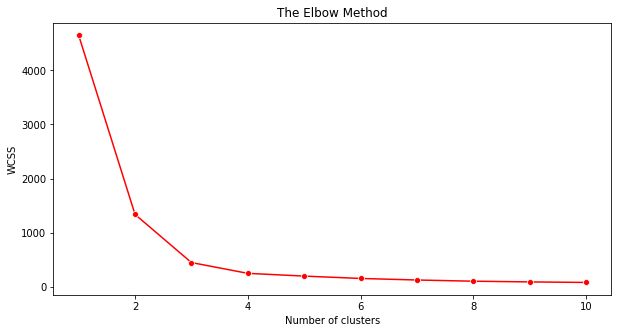

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Finding the proper cluster points and plotting the graph.

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

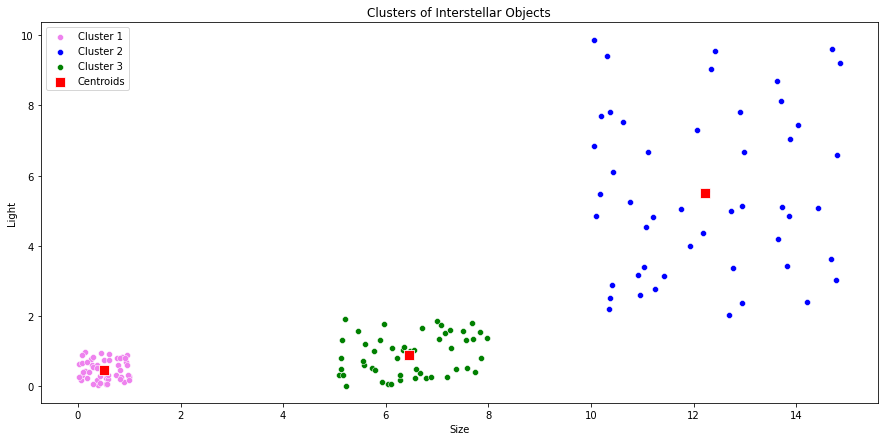

In [7]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'violet', label = 'Cluster 1')
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2')
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3')
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=100,marker=',')
plt.grid(False)
plt.title('Clusters of Interstellar Objects')
plt.xlabel('Size')
plt.ylabel('Light')
plt.legend()
plt.show()

The Yellow ones are the meteorites and other interstellar objects.

\
The Green ones are the Planets.

\
The Blue ones are the Stars.